In [17]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import nilearn

from nilearn import plotting
from nilearn import datasets
from nilearn import image
from nilearn.image import mean_img

In [18]:
os.getcwd()

'/Users/home/Documents/GitHub/MVPA-speech_project/MVPA-project-admin'

/Users/home/.local/lib/python3.8/site-packages/nilearn/image/resampling.py:527: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


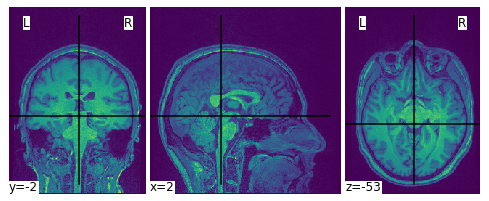

In [19]:
t1w_file_path='/Users/home/Documents/BIDS/sub-0001/ses-001/anat/sub-0001_ses-001_run-01_T1w.nii.gz'
plotting.plot_img(t1w_file_path)

In [20]:
smooth_anat_img = image.smooth_img(t1w_file_path, fwhm=6)

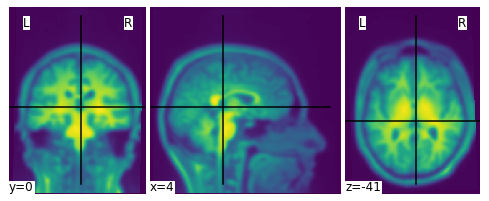

In [21]:
plotting.plot_img(smooth_anat_img)

In [27]:
from nilearn.glm.first_level import make_first_level_design_matrix
from nilearn.plotting import plot_design_matrix

tr = 2.5  # repetition time is ? second
n_scans = 222  # the acquisition comprises ?? scans
frame_times = np.arange(n_scans) * tr  # here are the correspoding frame times

# load events.tsv
events_PATH='/Users/home/Documents/GitHub/MVPA-speech_project/convert-bids-admin/events.tsv'

events_df = pd.read_csv(events_PATH, sep='\t', na_values="n/a")
print(events_df.head())



  trial_type  onset  duration
0  Baseline     0.0      12.5
1      Task    15.0      27.5
2  Baseline    45.0      12.5
3      Task    60.0      27.5
4  Baseline    90.0      12.5


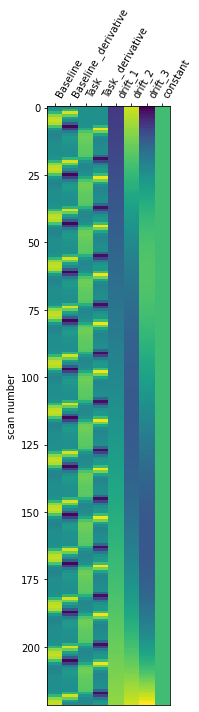

In [36]:
hrf_model='spm'
design_matrix = make_first_level_design_matrix(frame_times, events_df,
                                    drift_model='polynomial', drift_order=3,
                                    hrf_model=hrf_model)

plot_design_matrix(X1)

In [37]:
frame_times

array([  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,  20. ,
        22.5,  25. ,  27.5,  30. ,  32.5,  35. ,  37.5,  40. ,  42.5,
        45. ,  47.5,  50. ,  52.5,  55. ,  57.5,  60. ,  62.5,  65. ,
        67.5,  70. ,  72.5,  75. ,  77.5,  80. ,  82.5,  85. ,  87.5,
        90. ,  92.5,  95. ,  97.5, 100. , 102.5, 105. , 107.5, 110. ,
       112.5, 115. , 117.5, 120. , 122.5, 125. , 127.5, 130. , 132.5,
       135. , 137.5, 140. , 142.5, 145. , 147.5, 150. , 152.5, 155. ,
       157.5, 160. , 162.5, 165. , 167.5, 170. , 172.5, 175. , 177.5,
       180. , 182.5, 185. , 187.5, 190. , 192.5, 195. , 197.5, 200. ,
       202.5, 205. , 207.5, 210. , 212.5, 215. , 217.5, 220. , 222.5,
       225. , 227.5, 230. , 232.5, 235. , 237.5, 240. , 242.5, 245. ,
       247.5, 250. , 252.5, 255. , 257.5, 260. , 262.5, 265. , 267.5,
       270. , 272.5, 275. , 277.5, 280. , 282.5, 285. , 287.5, 290. ,
       292.5, 295. , 297.5, 300. , 302.5, 305. , 307.5, 310. , 312.5,
       315. , 317.5,

**Statistical analysis - 1st level**

In [38]:
contrast_matrix = np.eye(design_matrix.shape[1])
basic_contrasts = dict([(column, contrast_matrix[i])
                        for i, column in enumerate(design_matrix.columns)])

In [39]:
basic_contrasts

{'Baseline ': array([1., 0., 0., 0., 0., 0.]),
 'Task ': array([0., 1., 0., 0., 0., 0.]),
 'drift_1': array([0., 0., 1., 0., 0., 0.]),
 'drift_2': array([0., 0., 0., 1., 0., 0.]),
 'drift_3': array([0., 0., 0., 0., 1., 0.]),
 'constant': array([0., 0., 0., 0., 0., 1.])}

In [40]:
from nilearn.glm.first_level import FirstLevelModel

fmri_img='/Users/home/Documents/BIDS/sub-0001/ses-001/func/sub-0001_ses-001_task-fonologico_run-01_bold.nii.gz'

print('Fitting a GLM')
fmri_glm = FirstLevelModel()
fmri_glm = fmri_glm.fit(fmri_img, design_matrices=design_matrix)

Fitting a GLM


In [47]:
mean_image = mean_img(fmri_img)
z_map = fmri_glm.compute_contrast(basic_contrasts['Task '], output_type='z_score')

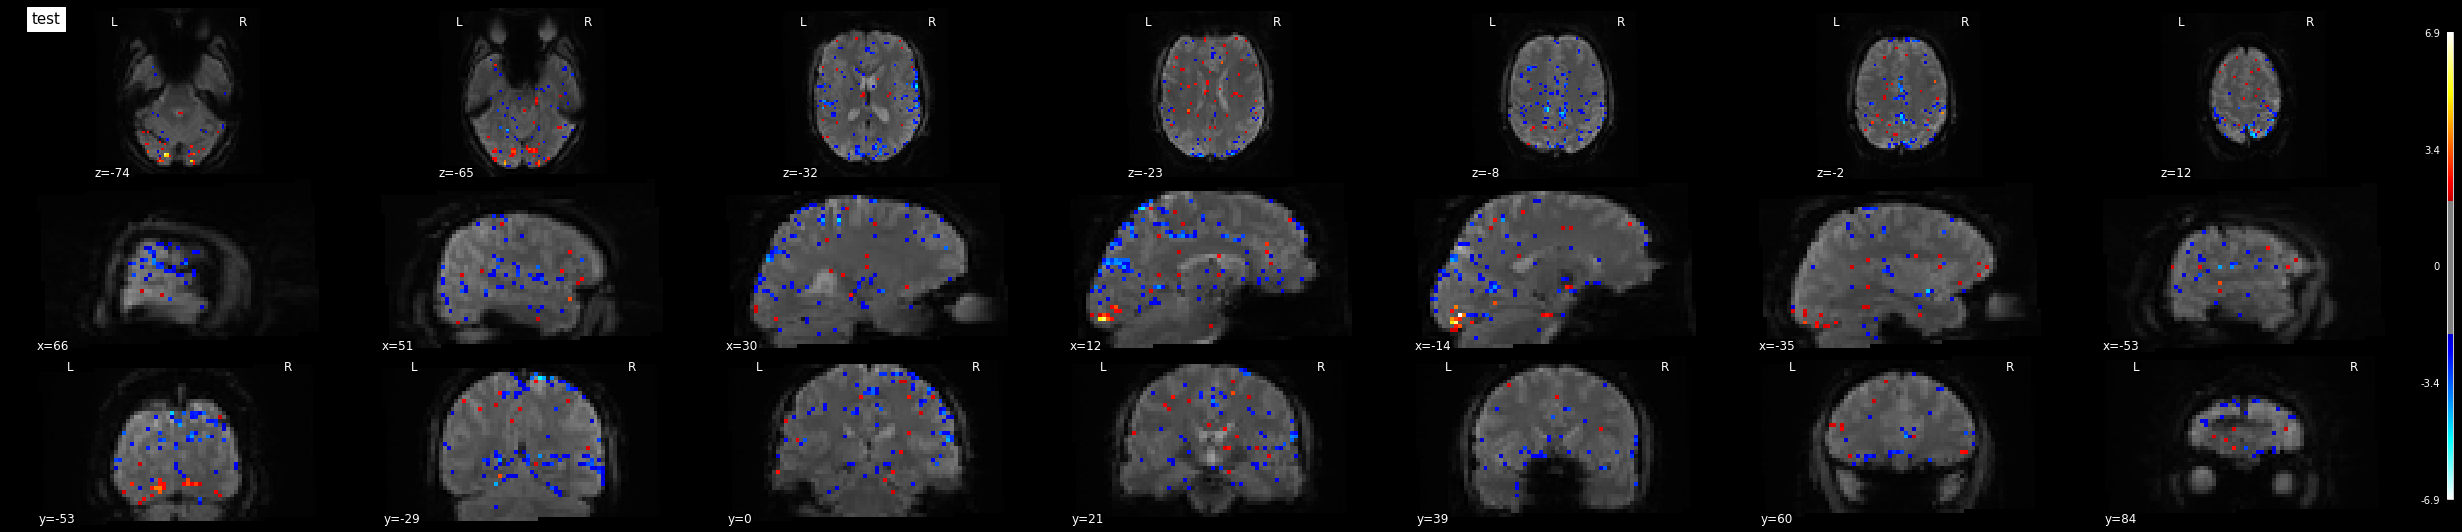

In [48]:
# plot the contrasts 
# the display is overlayed on the mean fMRI image
# a threshold of 3.0 is used, more sophisticated choices are possible
plotting.plot_stat_map(
    z_map, bg_img=mean_image, threshold=2.0, display_mode='mosaic', black_bg=True, title='test')
plotting.show()

